<a href="https://colab.research.google.com/github/jeyakumar-nanc/MachineLearning/blob/main/MLE_Gaussian_with_Exponential_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1 (30 points):
A) Let X = amount of time (in minutes) a ice cream man gets a new customer at his cart. The time is known to have an exponential distribution with the average amount of time between a new customer being four minutes.

Plot the probablity density function of the exponential distribution of this ice cream man getting a customer every 4 minutes. (10 points)

You may use the Python libraries to calculate the exponential distribution and to plot. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html


In [1]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np
import warnings
import math

The mean here is 4 minutes, therefore parameter = 1/4 = 0.25

Therefore, f(X) = 0.25 e-0.25X is the PDF for the given exponential distribution plot as shown below

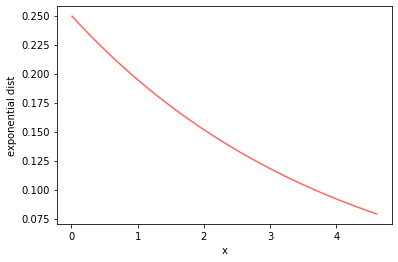

In [2]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = expon.stats(moments='mvsk')

x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)

dist = expon.pdf(x, scale=4)
plt.xlabel("x")
plt.ylabel("exponential dist")
ax.plot(x, dist,
       'r-',  alpha=0.6, label='expon pdf')

B) Now assume on a very hot day the ice cream man gets X customers and each new customer comes every 4 minutes. Generate X samples from the exponential distribution where X = 200 and the rate = 4. Plot the samples on a graph to show how they look graphically and they do look similiar to the above one

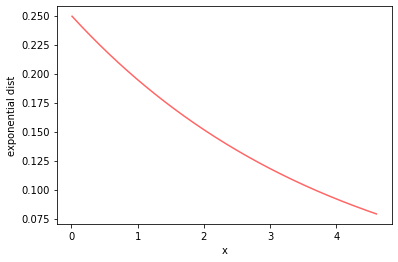

In [3]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 200)
dist = expon.pdf(x, scale=4)
plt.xlabel("x")
plt.ylabel("exponential dist")
ax.plot(x, dist,
       'r-', alpha=0.6, label='expon pdf')

**Part 2 (30 points)**
Assume that you are given the customer data generated in Part 1, implement a Gradient Descent algorithm from scratch that will estimate the Exponential distribution according to the Maximum Likelihood criterion.

Answer the following:

Plot the negative log likelihood of the exponential distribution. (10 points)

What is the lambda MLE of the generated data? (10 points)

Plot the estimated lambda vs iterations to showcase convergence towards the true lambda (10 points)

Read this article to obtain the likelihood and negative log likelihood function of the exponential distribution: https://www.statlect.com/fundamentals-of-statistics/exponential-distribution-maximum-likelihood


In [4]:
def gradient_descent(data, est_lambda, n, learning_rate, epochs):
  
  d_lambda = 0
  
  lmd_est_array = []    

  for k in range(epochs):          
    d_lambda = partial_deriv_lamda(data,n,est_lambda)    
    est_lambda = est_lambda - (learning_rate*(d_lambda))         
   
    lmd_est_array.append(est_lambda) #lambda estimates
   

  plot_nll(data,int(est_lambda))
  plot_lambda_est(epochs,lmd_est_array)

  print("MLE for rate parameter - %.2f" % (est_lambda))

In [5]:
def partial_deriv_lamda(data,n,est_lambda):
  warnings.filterwarnings("ignore")
  return (n*np.log(est_lambda) - np.sum(data));  

In [6]:
def plot_nll(data,est_lambda):    
  
  lm_set = np.linspace(0, 0.01, est_lambda)

  ll = []
  dist=0
  
  for x in lm_set:   
    nll = partial_deriv_lamda(data,len(data),x)             
    ll.append(-nll) #negative LL
        
  fig, ax = plt.subplots(1, 1)
  plt.title("NLL of Exponential distribution")
  plt.xlabel("Lambda")
  plt.ylabel("NLL")
  ax.plot(lm_set, ll,
       'r-', alpha=0.6, label='expon pdf')

In [7]:
def plot_lambda_est(epochs,lmda):   
  fig, ax = plt.subplots(1, 1)
  plt.title("Lambda Estimate Vs Iterations")  
  plt.xlabel("Iterations")  
  plt.ylabel("Lambda Estimate")
  ax.plot(np.linspace(0, 5, epochs),lmda,
       'r-',  alpha=0.6, label='expon pdf')

In [ ]:
#def plot_nll_old(x,ll):
  
#  fig, ax = plt.subplots(1, 1)
  #plt.title("Exponential Distribution")
  #plt.xlabel("x")
  #plt.ylabel("exponential dist")
  #ax.plot(x, ll,'r-', alpha=0.6, label='expon pdf')

MLE for rate parameter - 10.05


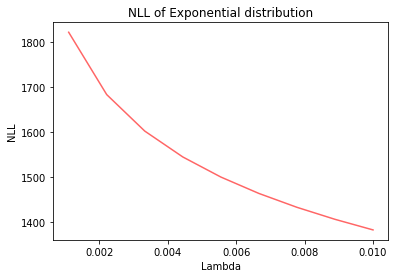

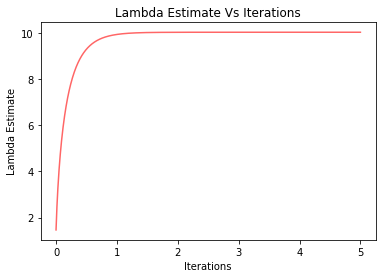

In [8]:
gradient_descent(x,1,len(x),0.001,1000)

Exponential density function => f(x) = λ * exp(-λ * X_i)
* Applying gradient descent algorithm to determine the optimal value for lamda.
* log likelihood of the exponential distribution: LL(λ;x1,x2..xn)=nlog(λ)- λ*sum

	1. Initially let lamda = 0 and learning rate as 0.001. This controls how much the value of lamda changes with each step
	2. Calculated the partial derivative of the loss function with respect to lamda, and plug in the current values of x in the function to obtain the derivative value lamda.
	3. Updated current value of lamda using the formula: est_lambda = est_lambda - (learning_rate*(d_lambda)) 
	4. Repeated the process until we got very small value for loss function. The value of lamda at the end of the iteration is the optimal value.

**Part 3:** Write the expression of the Negative Log Likelihood function . (10 points)

Write the parameters  and the  that minimize the NLL (10 points)

Derivations for w and sigma using chain rule - step by step

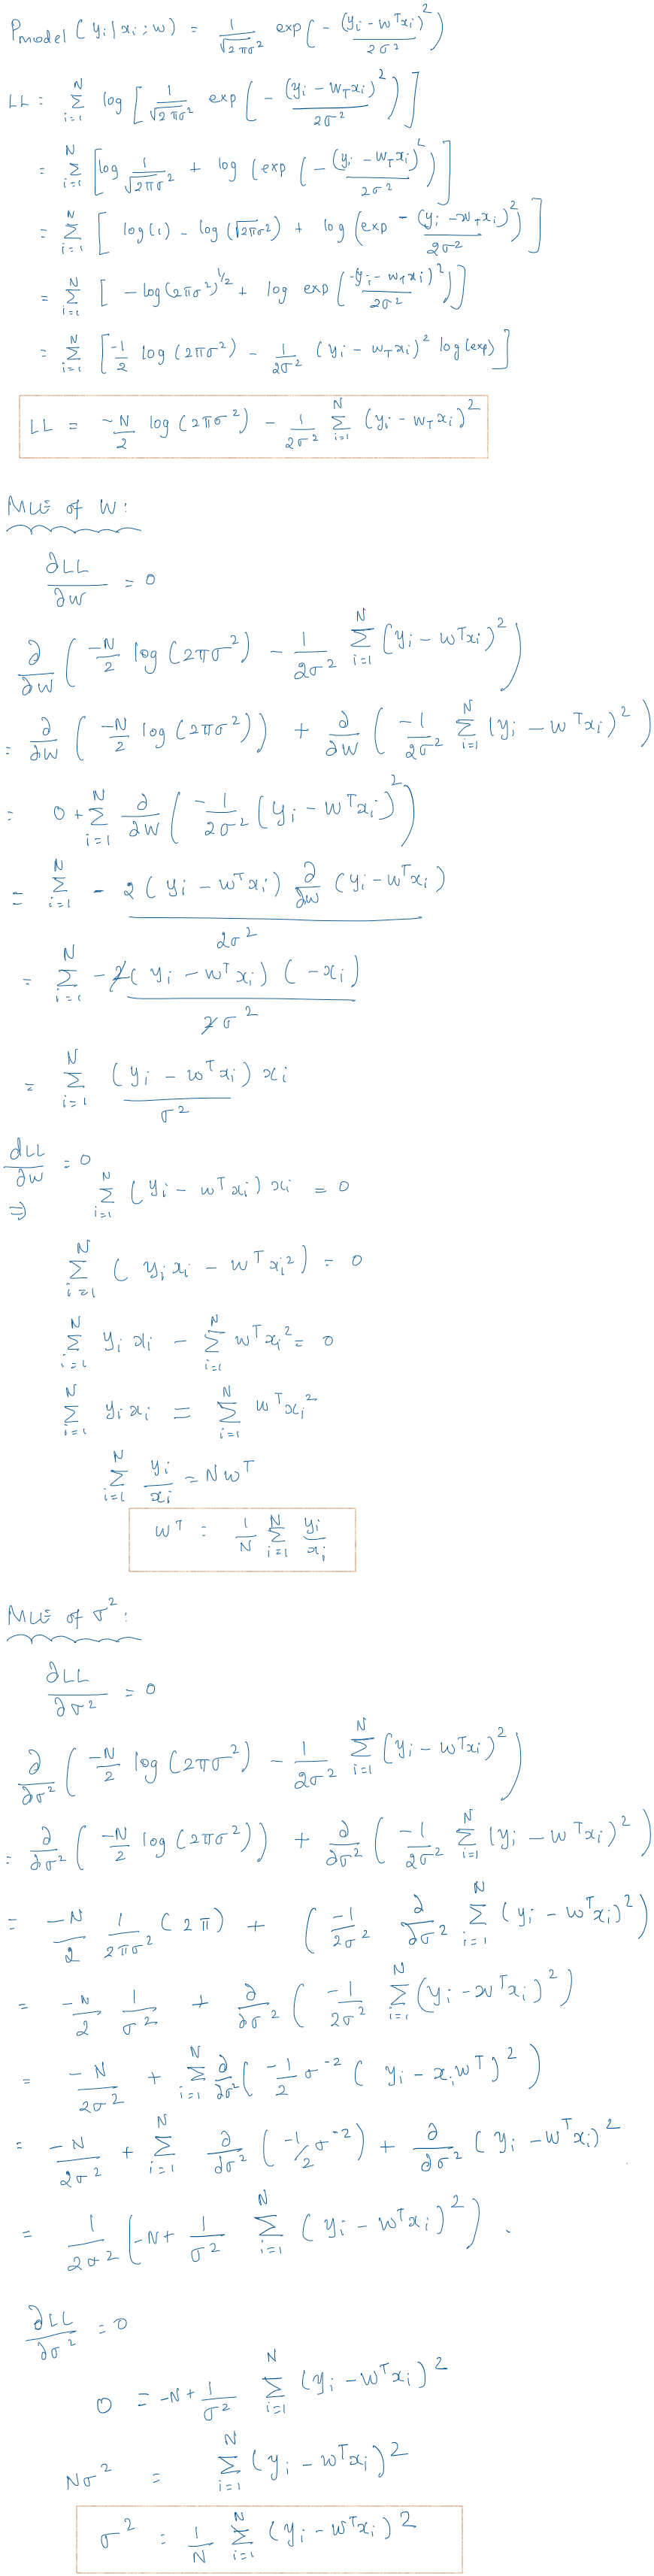

Part 3: Write a Python script that uses SGD to converge to  and 
 for the following dataset (20 points)

Apply the formula's obtained from above step to get the optimal values of w and sigma using SGD.

To estimate the optimal values of gaussian distribution used stochastic gradient descent algorithm.

1. Computed the partial derivates of w and sigma starting with w = [0,1,2,3,4,5] and sigma = 0 , learning rate = 0.0001
2. Plug and chug the derivate values to calculate the gradient
3. Estimated mean and varianance is derived from the formula est val = est val - loss fn ; where loss fn = learning rate * (partial derivate of mean/variance)
4. Repeated the process until we get very small value for loss function. The value of est_mean and est_var at the end of the iterations are optimal values for gaussian distribution

For our data, 
MLE of sigma - 59.39458710715569
MLE of w - [0.09097193 1.09097193 2.09097193 3.09097193 4.09097193 5.09097193]

In [9]:
def sgd(x,y, est_w, est_var, learning_rate, epochs):
  #prev_w = np.array([est_mean, est_var])
  
  for k in range(epochs):   
   # y_pred = m_curr * x + c_curr  
    d_w = partial_deriv_w(x,y, est_w, est_var,len(x))
    d_var = partial_deriv_sigma(x,y, est_w, est_var,len(x))
  
    est_w = est_w - (learning_rate*(-d_w))
    est_var = est_var - (learning_rate*(-d_var))
    #print(est_var)
    
  print(f"MLE of sigma - {est_var}")
  print(f"MLE of w - {est_w}")
  

In [27]:
#partial derivative w.r.t to w
def partial_deriv_w(x,y, w, est_var,N):
  warnings.filterwarnings("ignore")
  #return (np.sum((y - w.T.dot(x))*(x)/N)) #(np.sum((y/x)/N))
  return (np.sum((y/x)/N))

In [11]:
#partial derivative w.r.t to variance
def partial_deriv_sigma(x,y, w, est_var,N):
  warnings.filterwarnings("ignore")
  return (math.sqrt((np.sum((y - w.T.dot(x))**2))/N))
  #((np.sum((y - w.T.dot(x))**2))/N)

In [45]:
x = np.array([8, 16, 22, 33, 50, 51])
y = np.array([5, 20, 14, 32, 42, 58])
w = np.array([0,1,2,3,4,5])

In [53]:
sgd(x,y, w, 0, 0.0001, 1000)

MLE of sigma - 59.39458710715569
MLE of w - [0.09097193 1.09097193 2.09097193 3.09097193 4.09097193 5.09097193]
